In [261]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy.signal import butter, lfilter, iirfilter, correlate

import fastdmf as dmf

In [121]:
params = dmf.default_params()
params

{'C': array([[0.        , 0.1130285 , 0.14996669, ..., 0.        , 0.        ,
         0.        ],
        [0.1130285 , 0.        , 0.43577847, ..., 0.        , 0.        ,
         0.        ],
        [0.14996669, 0.43577847, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.14298715],
        [0.        , 0.        , 0.        , ..., 0.        , 0.14298715,
         0.        ]]),
 'receptors': 0,
 'dt': 0.1,
 'taon': 100,
 'taog': 10,
 'gamma': 0.641,
 'sigma': 0.01,
 'JN': 0.15,
 'I0': 0.382,
 'Jexte': 1.0,
 'Jexti': 0.7,
 'w': 1.4,
 'de': 0.16,
 'Ie': 0.4032258064516129,
 'g_e': 310.0,
 'di': 0.087,
 'Ii': 0.28780487804878047,
 'g_i': 615.0,
 'wgaine': 0,
 'wgaini': 0,
 'G': 2,
 'TR': 2,
 'dtt': 0.001,
 'batch_size': 5000,
 'J': array([ 3.3430727 ,  5.81312357,  4.54133492, 

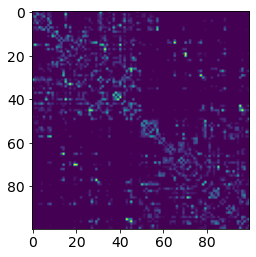

In [122]:
plt.imshow(params['C'])
plt.show()

In [123]:
# Run simulation for a given nb of steps (milliseconds)
nb_steps = int(1e6)
BOLD = dmf.run(params, nb_steps)

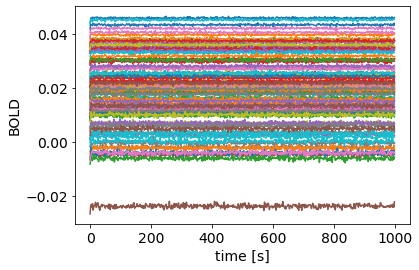

In [124]:
times = np.arange(BOLD.shape[1]) * params['TR']
plt.plot(times, BOLD.T)

plt.xlabel('time [s]')
plt.ylabel('BOLD')
plt.show()

In [131]:
# Minimal "post-processing": band-pass filter and remove the starting and
# trailing ends of the simulation to avoid transient and filtering artefacts
b, a = butter(2, np.array([0.008, 0.09])*2*params['TR'], btype='band')
BOLD_filtered = lfilter(b, a, BOLD)

trans = 50
BOLD_ok = BOLD_filtered[:,trans:]

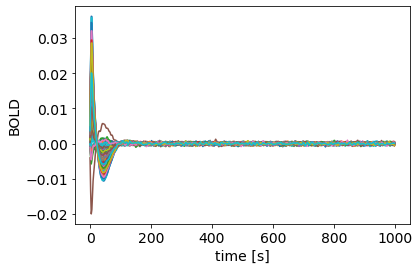

In [132]:
times = np.arange(BOLD_filtered.shape[1]) * params['TR']
plt.plot(times, BOLD_filtered.T)

plt.xlabel('time [s]')
plt.ylabel('BOLD')
plt.show()

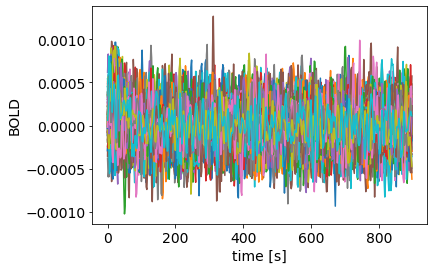

In [133]:
times = np.arange(BOLD_ok.shape[1]) * params['TR']
plt.plot(times, BOLD_ok.T)

plt.xlabel('time [s]')
plt.ylabel('BOLD')
plt.show()

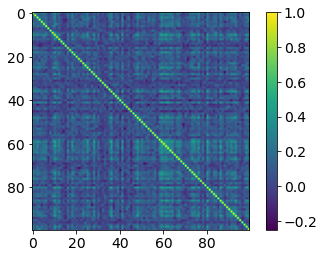

In [141]:
# Compute FC
plt.imshow(np.corrcoef(BOLD_ok))
plt.colorbar()
plt.show()

In [62]:
# Compute DFC

In [73]:
params_new = params.copy()
params_new['G'] = 1.5

In [77]:
# Run simulation for a given nb of steps (milliseconds)
nb_steps = int(1e6)
BOLD = dmf.run(params_new, nb_steps)

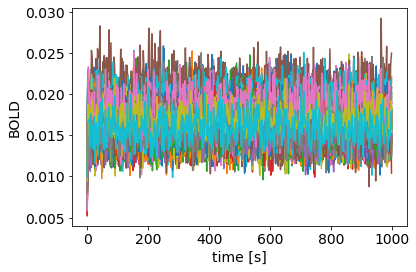

In [113]:
times = np.arange(BOLD.shape[1]) * params['TR']
plt.plot(times, BOLD.T)

plt.xlabel('time [s]')
plt.ylabel('BOLD')
plt.show()

In [105]:
# Minimal "post-processing": band-pass filter and remove the starting and
# trailing ends of the simulation to avoid transient and filtering artefacts
n_order = 3
Nyquist_freq = 0.5 / params['TR'] # Nyquist frequency
low_f = 0.01
high_f = 0.1

#b, a = butter(n_order, np.array([low_f, high_f])/Nyquist_freq, btype='band')
b,a = iirfilter(n_order,np.array([low_f, high_f])/Nyquist_freq,btype='bandpass',ftype='butter')
BOLD_filtered = lfilter(b, a, BOLD)

trans = 30
BOLD_ok = BOLD_filtered[:,trans:]

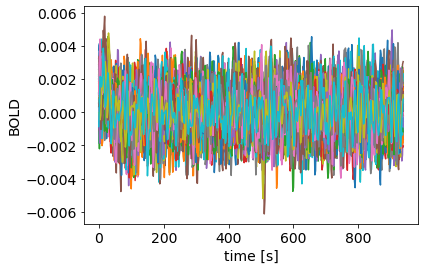

In [106]:
times = np.arange(BOLD_ok.shape[1]) * params['TR']
plt.plot(times, BOLD_ok.T)

plt.xlabel('time [s]')
plt.ylabel('BOLD')
plt.show()

In [139]:
BOLD_ok.shape

(100, 450)

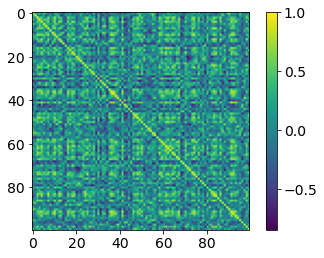

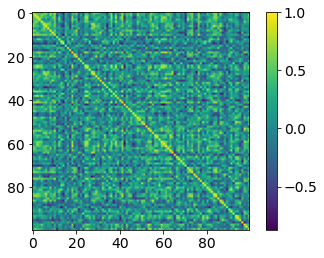

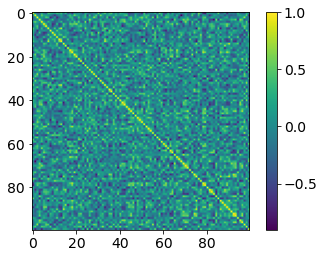

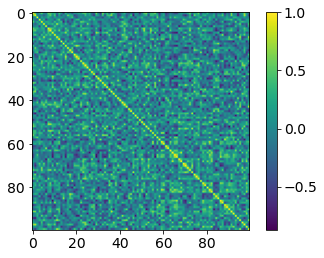

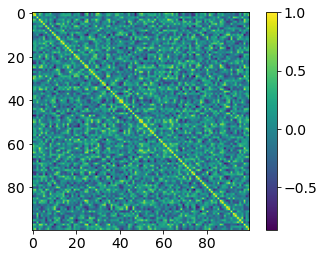

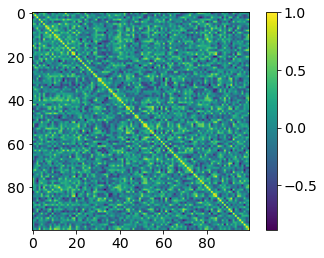

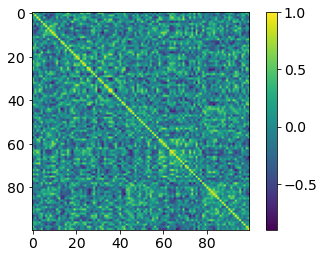

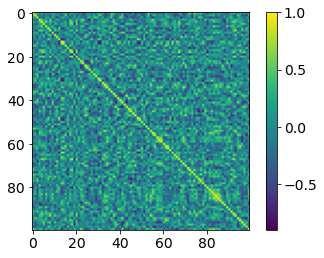

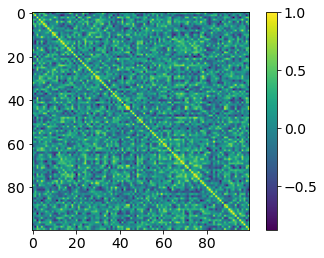

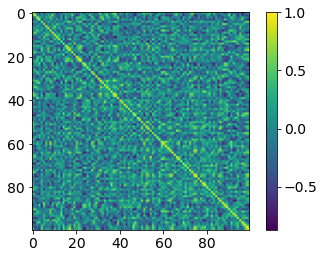

In [140]:
# Compute DFC
delta = 20

for t in range(10):
    plt.imshow(np.corrcoef(BOLD_ok[:,delta*t:delta*(t+1)]))
    plt.colorbar()
    plt.show()

In [201]:
#Gs = [1., 1.5, 2.]
Gs = [1.3, 1.7]

nb_steps = int(5e6)
#res = []

for i,G in enumerate(Gs):
    print(f'##### {i+1}/{len(Gs)} #####')
    # Load params
    tmp_params = dmf.default_params()
    tmp_params['G'] = G
    
    # Run
    tmp = dmf.run(tmp_params, nb_steps)
    
    # Store results
    res.append(tmp)

##### 1/2 #####
##### 2/2 #####


In [185]:
# Minimal "post-processing": band-pass filter and remove the starting and
# trailing ends of the simulation to avoid transient and filtering artefacts
n_order = 3
Nyquist_freq = 0.5 / params['TR'] # Nyquist frequency
low_f = 0.008
high_f = 0.09

b, a = butter(n_order, np.array([low_f, high_f])/Nyquist_freq, btype='band')
#b,a = iirfilter(n_order,np.array([low_f, high_f])/Nyquist_freq,btype='bandpass',ftype='butter')

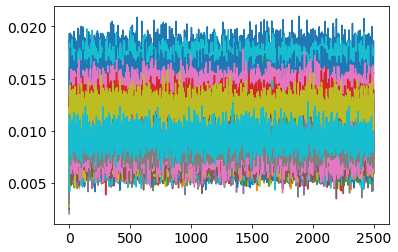

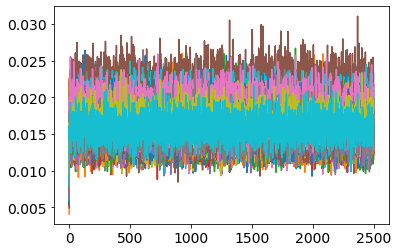

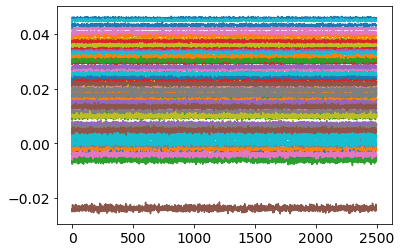

In [186]:
for tmp in res:
    plt.plot(tmp.T)
    plt.show()

In [187]:
res_filtered = [lfilter(b, a, BOLD) for BOLD in res]

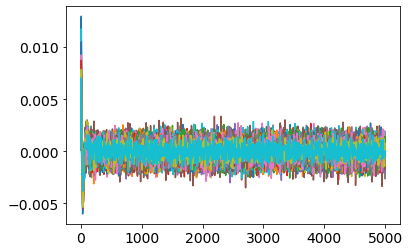

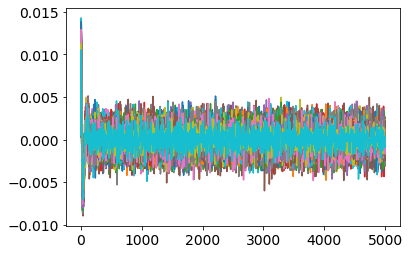

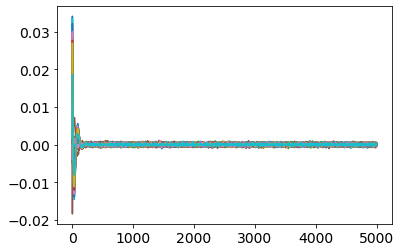

In [188]:
for tmp in res_filtered:
    plt.plot(np.arange(tmp.shape[1])*params['TR'], tmp[:,:].T)
    plt.show()

(100, 1500)


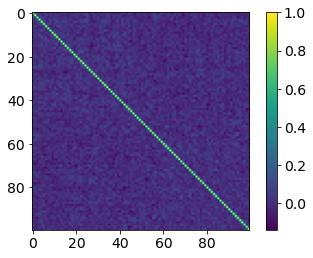

(100, 1500)


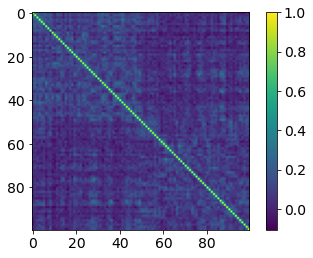

(100, 1500)


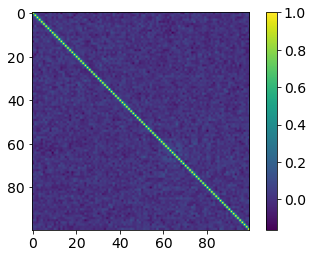

In [211]:
for tmp in res_filtered:
    tt = tmp[:,1000:]
    print(tt.shape)
    plt.imshow(np.corrcoef(tt))
    plt.colorbar()
    plt.show()

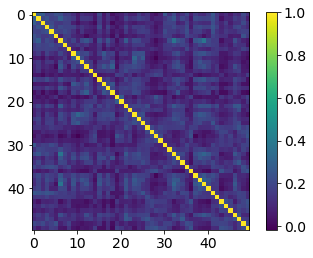

In [195]:
plt.imshow(np.corrcoef(res[1][:50,200:]))
plt.colorbar()
plt.show()

In [203]:
# Save results
folder = 'results/'

for i, tmp in enumerate(res[-2:]):
    fname = f'bold_G_{Gs[i]}.npy'
    print(fname)
    np.save(folder+fname, tmp)

bold_G_1.3.npy
bold_G_1.7.npy


In [212]:
# Load results
folder = 'results/'

Gs = [1., 1.3, 1.5, 1.7, 2.]

res = []

for i, G in enumerate(Gs):
    fname = f'bold_G_{Gs[i]}.npy'
    print(fname)
    tmp = np.load(folder+fname)
    res.append(tmp)

bold_G_1.0.npy
bold_G_1.3.npy
bold_G_1.5.npy
bold_G_1.7.npy
bold_G_2.0.npy


In [213]:
# Minimal "post-processing": band-pass filter and remove the starting and
# trailing ends of the simulation to avoid transient and filtering artefacts
n_order = 3
Nyquist_freq = 0.5 / params['TR'] # Nyquist frequency
low_f = 0.01
high_f = 0.1

#b, a = butter(n_order, np.array([low_f, high_f])/Nyquist_freq, btype='band')
b,a = iirfilter(n_order,np.array([low_f, high_f])/Nyquist_freq,btype='bandpass',ftype='butter')

In [216]:
res_filtered = [lfilter(b,a,BOLD) for BOLD in res]

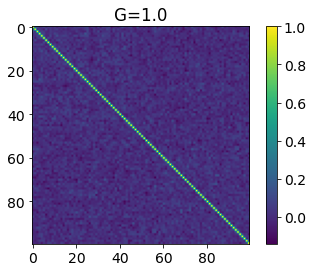

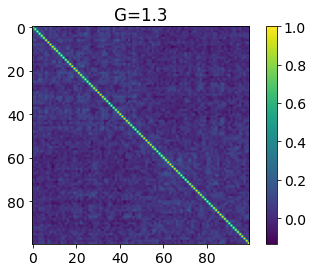

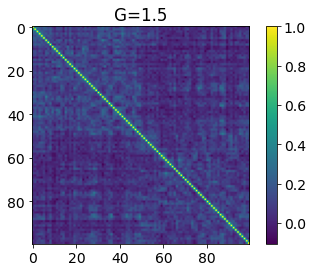

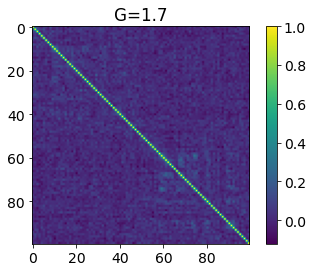

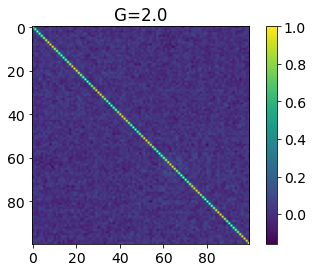

In [221]:
for i, tmp in enumerate(res_filtered):
    tt = tmp[:,1000:]
    #print(tt.shape)
    plt.imshow(np.corrcoef(tt))
    plt.colorbar()
    plt.title('G='+str(Gs[i]))
    plt.show()

In [248]:
bold = res_filtered[2][:,1000:]

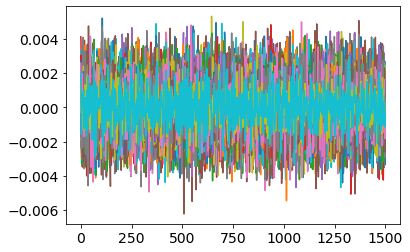

In [249]:
plt.plot(bold.T)
plt.show()

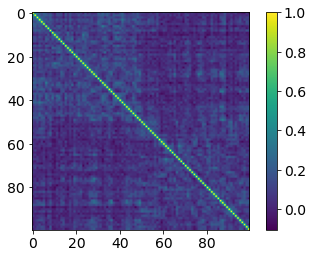

In [251]:
plt.imshow(np.corrcoef(bold))
plt.colorbar()
plt.show()

In [280]:
N, Tmax = bold.shape
print(Tmax)

1500


In [331]:
window = 30
shift = 3
n_fcd = (Tmax - 2*window) // shift
print(n_fcd)

480


In [332]:
dfc = np.zeros((n_fcd,n_fcd))
idx = np.triu_indices(N,1)

for i in range(n_fcd-1):
    print(f'{i+1}/{n_fcd-1}')
    tmp_X = bold[:,i*shift:i*shift+window]
    tmp_X = np.corrcoef(tmp_X)[idx]
    
    for j in range(i+1,n_fcd):
        tmp_Y = bold[:,j*shift:j*shift+window]
        tmp_Y = np.corrcoef(tmp_Y)[idx]
        
        dfc[i,j] = np.corrcoef(tmp_X, tmp_Y)[0,1]
        
dfc += np.eye(n_fcd)

1/479
2/479
3/479
4/479
5/479
6/479
7/479
8/479
9/479
10/479
11/479
12/479
13/479
14/479
15/479
16/479
17/479
18/479
19/479
20/479
21/479
22/479
23/479
24/479
25/479
26/479
27/479
28/479
29/479
30/479
31/479
32/479
33/479
34/479
35/479
36/479
37/479
38/479
39/479
40/479
41/479
42/479
43/479
44/479
45/479
46/479
47/479
48/479
49/479
50/479
51/479
52/479
53/479
54/479
55/479
56/479
57/479
58/479
59/479
60/479
61/479
62/479
63/479
64/479
65/479
66/479
67/479
68/479
69/479
70/479
71/479
72/479
73/479
74/479
75/479
76/479
77/479
78/479
79/479
80/479
81/479
82/479
83/479
84/479
85/479
86/479
87/479
88/479
89/479
90/479
91/479
92/479
93/479
94/479
95/479
96/479
97/479
98/479
99/479
100/479
101/479
102/479
103/479
104/479
105/479
106/479
107/479
108/479
109/479
110/479
111/479
112/479
113/479
114/479
115/479
116/479
117/479
118/479
119/479
120/479
121/479
122/479
123/479
124/479
125/479
126/479
127/479
128/479
129/479
130/479
131/479
132/479
133/479
134/479
135/479
136/479
137/479
138/479
139/

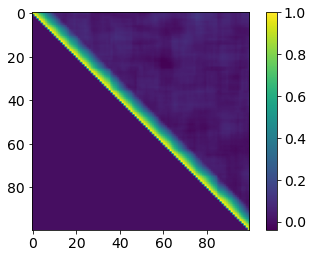

In [339]:
plt.imshow(dfc[:100,:100])
plt.colorbar()
plt.show()